In [3]:
import sqlite3
import pandas as pd

# Step 1: Connect to your SQLite database
db_path = r"C:\Users\Jayanth\OneDrive - The Pennsylvania State University\Desktop\Visual\Python statistics\sqllite.db"
conn = sqlite3.connect(db_path)

# Step 2: Read the hospital table into a DataFrame
df = pd.read_sql_query("SELECT * FROM hospital", conn)
print("Original data:")
print(df.head())



Original data:
  patient_id   age  gender blood_pressure  cholesterol   bmi diabetes  \
0          2  46.0  Female         120/92        292.0  36.3       No   
1          3  89.0   Other         135/78        153.0  30.3       No   
2          4  84.0  Female         123/80        153.0  31.5       No   
3          5  32.0   Other         135/84        205.0  18.4       No   
4          6  75.0  Female        139/100        194.0  33.5       No   

  hypertension  medication_count  length_of_stay discharge_destination  \
0           No               4.0             3.0      Nursing_Facility   
1          Yes               1.0             1.0                  Home   
2          Yes               3.0            10.0                  Home   
3          Yes               6.0             4.0      Nursing_Facility   
4          Yes               0.0            10.0                  Home   

  readmitted_30_days  LOS_Double  LOS_GT_5  Senior_LongStay  BitwiseDemo  \
0                 No     

In [4]:
df.describe()

,age,cholesterol,bmi,medication_count,length_of_stay,LOS_Double,LOS_GT_5,Senior_LongStay,BitwiseDemo,IsHomeDischarge,AgeSquared
count,30000.000000,30000.000000,30000.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,53.883767,225.259900,28.946177,5.012267,5.503050,11.006100,0.499550,0.121537,0.492316,0.899130,3346.800393
std,21.056194,43.585588,6.348187,3.166436,2.867228,5.734456,0.500008,0.326756,0.499949,0.301162,2305.874969
min,18.000000,150.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,324.000000
25%,36.000000,188.000000,23.400000,2.000000,3.000000,6.000000,0.000000,0.000000,0.000000,1.000000,1296.000000
50%,54.000000,225.000000,28.900000,5.000000,5.000000,10.000000,0.000000,0.000000,0.000000,1.000000,2916.000000
75%,72.000000,263.000000,34.500000,8.000000,8.000000,16.000000,1.000000,0.000000,1.000000,1.000000,5184.000000
max,90.000000,300.000000,40.000000,10.000000,10.000000,20.000000,1.000000,1.000000,1.000000,1.000000,8100.000000


In [5]:
# Bayesian Inference P(Readmitted | Diabetes = Yes)
readmit_given_diabetes = df[(df['diabetes'] == 'Yes') & 
                                    (df['readmitted_30_days'] == 'Yes')].shape[0] / \
                         df[df['diabetes'] == 'Yes'].shape[0]


In [6]:
print(readmit_given_diabetes)

0.13212469895638213


<Axes: xlabel='age', ylabel='Density'>

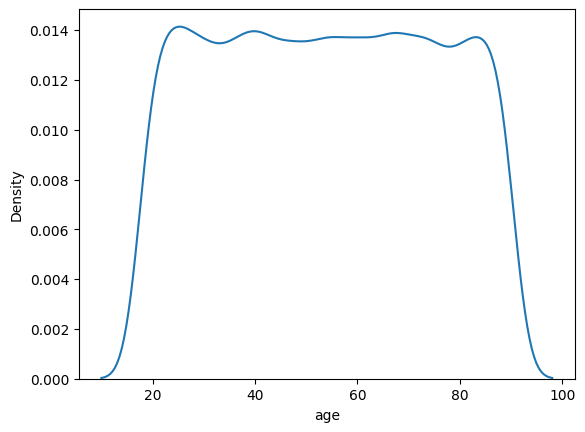

In [7]:
# Density Plots 
import seaborn as sns
sns.kdeplot(df['age'])


In [8]:
# Estimation
mean_age_readmit = df[df['readmitted_30_days'] == 'Yes']['age'].mean()
print(mean_age_readmit)

53.9033487612306


In [9]:
# Confidence Margin 
from scipy import stats
mean_bmi = df['bmi'].mean()
std_bmi = df['bmi'].std()
n = len(df)

conf_interval = stats.norm.interval(0.95, loc=mean_bmi, scale=std_bmi / (n**0.5))
print(conf_interval)

(np.float64(28.874341490717644), np.float64(29.018011842615696))


We are 95% confident that the true population mean BMI lies between 28.87 and 29.02

In [10]:
contingency_table = pd.crosstab(df['diabetes'], df['readmitted_30_days'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test between Diabetes and Readmission:")
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"p-value: {p_val:.4e}")
print(f"Degrees of Freedom: {dof}")

NameError: name 'chi2_contingency' is not defined

Type	         Example Hypothesis	                     Test
Null (H₀)	     Readmission is independent of diabetes	 None
Alternative (H₁) Readmission depends on diabetes	     Use Chi-Square Test for categorical data: